<a href="https://colab.research.google.com/github/BoWarburton/DS-Unit-2-Applied-Modeling/blob/master/Bo_Warburton_LS_DS_234_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model Interpretation

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your work.

- [X] Continue to iterate on your project: data cleaning, exploratory visualization, feature engineering, modeling.
- [X] Make at least 1 partial dependence plot to explain your model.
- [X] Make at least 1 Shapley force plot to explain an individual prediction.
- [X] **Share at least 1 visualization (of any type) on Slack!**

If you aren't ready to make these plots with your own dataset, you can practice these objectives with any dataset you've worked with previously. Example solutions are available for Partial Dependence Plots with the Tanzania Waterpumps dataset, and Shapley force plots with the Titanic dataset. (These datasets are available in the data directory of this repository.)

Please be aware that **multi-class classification** will result in multiple Partial Dependence Plots (one for each class), and multiple sets of Shapley Values (one for each class).

## Reading

Top recommendations in _**bold italic:**_

#### Permutation Importances
- _**[Kaggle / Dan Becker: Machine Learning Explainability](https://www.kaggle.com/dansbecker/permutation-importance)**_
- [Christoph Molnar: Interpretable Machine Learning](https://christophm.github.io/interpretable-ml-book/feature-importance.html)

#### (Default) Feature Importances
  - [Ando Saabas: Selecting good features, Part 3, Random Forests](https://blog.datadive.net/selecting-good-features-part-iii-random-forests/)
  - [Terence Parr, et al: Beware Default Random Forest Importances](https://explained.ai/rf-importance/index.html)

#### Gradient Boosting
  - [A Gentle Introduction to the Gradient Boosting Algorithm for Machine Learning](https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/)
  - [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/ISLR%20Seventh%20Printing.pdf), Chapter 8
  - _**[Gradient Boosting Explained](https://www.gormanalysis.com/blog/gradient-boosting-explained/)**_ — Ben Gorman
  - [Gradient Boosting Explained](http://arogozhnikov.github.io/2016/06/24/gradient_boosting_explained.html) — Alex Rogozhnikov
  - [How to explain gradient boosting](https://explained.ai/gradient-boosting/) — Terence Parr & Jeremy Howard

## Stretch Goals

#### Partial Dependence Plots
- [ ] Make multiple PDPs with 1 feature in isolation.
- [ ] Make multiple PDPs with 2 features in interaction. 
- [ ] Use Plotly to make a 3D PDP.
- [ ] Make PDPs with categorical feature(s). Use Ordinal Encoder, outside of a pipeline, to encode your data first. If there is a natural ordering, then take the time to encode it that way, instead of random integers. Then use the encoded data with pdpbox. Get readable category names on your plot, instead of integer category codes.

#### Shap Values
- [ ] Make Shapley force plots to explain at least 4 individual predictions.
    - If your project is Binary Classification, you can do a True Positive, True Negative, False Positive, False Negative.
    - If your project is Regression, you can do a high prediction with low error, a low prediction with low error, a high prediction with high error, and a low prediction with high error.
- [ ] Use Shapley values to display verbal explanations of individual predictions.
- [ ] Use the SHAP library for other visualization types.

The [SHAP repo](https://github.com/slundberg/shap) has examples for many visualization types, including:

- Force Plot, individual predictions
- Force Plot, multiple predictions
- Dependence Plot
- Summary Plot
- Summary Plot, Bar
- Interaction Values
- Decision Plots

We just did the first type during the lesson. The [Kaggle microcourse](https://www.kaggle.com/dansbecker/advanced-uses-of-shap-values) shows two more. Experiment and see what you can learn!

### Links

#### Partial Dependence Plots
- [Kaggle / Dan Becker: Machine Learning Explainability — Partial Dependence Plots](https://www.kaggle.com/dansbecker/partial-plots)
- [Christoph Molnar: Interpretable Machine Learning — Partial Dependence Plots](https://christophm.github.io/interpretable-ml-book/pdp.html) + [animated explanation](https://twitter.com/ChristophMolnar/status/1066398522608635904)
- [pdpbox repo](https://github.com/SauceCat/PDPbox) & [docs](https://pdpbox.readthedocs.io/en/latest/)
- [Plotly: 3D PDP example](https://plot.ly/scikit-learn/plot-partial-dependence/#partial-dependence-of-house-value-on-median-age-and-average-occupancy)

#### Shapley Values
- [Kaggle / Dan Becker: Machine Learning Explainability — SHAP Values](https://www.kaggle.com/learn/machine-learning-explainability)
- [Christoph Molnar: Interpretable Machine Learning — Shapley Values](https://christophm.github.io/interpretable-ml-book/shapley.html)
- [SHAP repo](https://github.com/slundberg/shap) & [docs](https://shap.readthedocs.io/en/latest/)

# The Data
COB Sales and HUNS at Five KFC Stores from 2018 and 2019

## The Setup

In [0]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://github.com/BoWarburton/heads-used-not-sold/raw/master/'
    !pip install category_encoders==2.*
    !pip install pandas-profiling==2.*
    !pip install eli5
    !pip install pdpbox
    !pip install shap

# If you're working locally:
else:
    DATA_PATH = '../data/'

In [0]:
# Ignore this warning: https://github.com/dmlc/xgboost/issues/4300
# xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='xgboost')

## The Reading

In [0]:
# Compressed file example
# Uncompress data if necessary and change directory to where uncompressed
# import tarfile
# tarfile.open('instacart_online_grocery_shopping_2017_05_01.tar.gz').extractall()
# %cd instacart_2017_05_01

In [0]:
# Multiple files example
# If there are several files in this dataset,
# Loop through files ending in csv and print filename, shape, and first rows
# Using helpful library "glob" here; you can also use import os
# from glob import glob
# for filename in glob('*.csv'):
#     print(filename)

# import pandas as pd
# from IPython.display import display

# def preview():
#   for filename in glob('*.csv'):
#     df = pd.read_csv(filename)
#     print(filename)
#     print(f'Shape: {df.shape}')
#     display(df.head())

# preview()

In [0]:
# Each row is Chicken on Bone (COB) and Heads Used but Not Sold (HUNS) for one date at one KFC
import pandas as pd
data_file = 'huns.csv'
df_original = pd.read_csv(DATA_PATH+data_file)

In [0]:
df_original.head()

,StoreCode,Date,ChickenHuns,1pc,2 pc,3 pc,4 pc,8pc,8pc Meal,12 pc,12 pc Meal,16 pc,16 pc Meal,20 pc,20 pc Meal
0,C750001,20180221,20.625,23,61,10,0,29,1,7,1,4,0,1,1
1,C750001,20180222,18.125,19,78,5,0,23,3,14,0,9,1,0,0
2,C750001,20180223,14.875,16,68,8,0,34,1,10,2,7,1,1,0
3,C750001,20180224,25.875,17,48,4,0,29,2,9,1,5,1,0,0
4,C750001,20180225,24.500,21,43,6,0,27,3,14,1,5,1,0,0


In [0]:
# Good dataset with 3,530 observations, 15 features, no null values
df_original.shape

(3530, 15)

In [0]:
# The target is ChickenHuns
df_original.describe()

,Date,ChickenHuns,1pc,2 pc,3 pc,4 pc,8pc,8pc Meal,12 pc,12 pc Meal,16 pc,16 pc Meal,20 pc,20 pc Meal
count,3.530000e+03,3530.000000,3530.000000,3530.00000,3530.000000,3530.000000,3530.000000,3530.000000,3530.000000,3530.000000,3530.000000,3530.000000,3530.000000,3530.000000
mean,2.018706e+07,17.155524,13.025779,41.30085,6.333144,2.237960,6.272238,2.341643,5.910198,1.699433,3.461190,0.987252,0.273088,0.322380
std,5.988819e+03,36.131985,8.964851,15.46182,5.611545,2.649557,5.881116,1.757144,3.246575,1.475991,2.381875,1.212996,0.598653,0.778198
min,2.018022e+07,-548.500000,0.000000,3.00000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000
25%,2.018082e+07,10.750000,7.000000,30.00000,2.000000,0.000000,2.000000,1.000000,4.000000,1.000000,2.000000,0.000000,0.000000,0.000000
50%,2.019022e+07,15.500000,13.000000,40.00000,5.000000,1.000000,4.000000,2.000000,5.000000,1.000000,3.000000,1.000000,0.000000,0.000000
75%,2.019082e+07,21.000000,19.000000,51.00000,9.000000,4.000000,9.000000,3.000000,8.000000,2.000000,5.000000,2.000000,0.000000,0.000000
max,2.020022e+07,1053.500000,54.000000,110.00000,38.000000,15.000000,34.000000,14.000000,22.000000,9.000000,22.000000,14.000000,6.000000,11.000000


In [0]:
df_original.dtypes

StoreCode       object
Date             int64
ChickenHuns    float64
1pc              int64
2 pc             int64
3 pc             int64
4 pc             int64
8pc              int64
8pc Meal         int64
12 pc            int64
12 pc Meal       int64
16 pc            int64
16 pc Meal       int64
20 pc            int64
20 pc Meal       int64
dtype: object

 ## The Cleaning
- Drop columns
- Fix column names (capitalization, spacing, spelling)
- Outliers
- Null values
- Generally inconvenient data

Note to self: check with the business about negative numbers. Maybe that is a correct number for some reason. Shouldn't make assumptions.

Nothing here should create a risk of overfitting or creating an incorrect model.

In [0]:
# Drop columns
df = df_original
# drop_columns = ['']
# df = df_dcf.drop(columns = drop_columns)
df.shape

(3530, 15)

In [0]:
# Capitalization: map column names to lower case
df.columns = map(str.lower, df.columns)
df.describe()

,date,chickenhuns,1pc,2 pc,3 pc,4 pc,8pc,8pc meal,12 pc,12 pc meal,16 pc,16 pc meal,20 pc,20 pc meal
count,3.530000e+03,3530.000000,3530.000000,3530.00000,3530.000000,3530.000000,3530.000000,3530.000000,3530.000000,3530.000000,3530.000000,3530.000000,3530.000000,3530.000000
mean,2.018706e+07,17.155524,13.025779,41.30085,6.333144,2.237960,6.272238,2.341643,5.910198,1.699433,3.461190,0.987252,0.273088,0.322380
std,5.988819e+03,36.131985,8.964851,15.46182,5.611545,2.649557,5.881116,1.757144,3.246575,1.475991,2.381875,1.212996,0.598653,0.778198
min,2.018022e+07,-548.500000,0.000000,3.00000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000
25%,2.018082e+07,10.750000,7.000000,30.00000,2.000000,0.000000,2.000000,1.000000,4.000000,1.000000,2.000000,0.000000,0.000000,0.000000
50%,2.019022e+07,15.500000,13.000000,40.00000,5.000000,1.000000,4.000000,2.000000,5.000000,1.000000,3.000000,1.000000,0.000000,0.000000
75%,2.019082e+07,21.000000,19.000000,51.00000,9.000000,4.000000,9.000000,3.000000,8.000000,2.000000,5.000000,2.000000,0.000000,0.000000
max,2.020022e+07,1053.500000,54.000000,110.00000,38.000000,15.000000,34.000000,14.000000,22.000000,9.000000,22.000000,14.000000,6.000000,11.000000


In [0]:
df.dtypes

storecode       object
date             int64
chickenhuns    float64
1pc              int64
2 pc             int64
3 pc             int64
4 pc             int64
8pc              int64
8pc meal         int64
12 pc            int64
12 pc meal       int64
16 pc            int64
16 pc meal       int64
20 pc            int64
20 pc meal       int64
dtype: object

In [0]:
# Spacing, spelling
df = df.rename(columns = {'storecode':'store_code',
                          'chickenhuns':'huns',
                          '2 pc':'2pc',
                          '3 pc':'3pc',
                          '4 pc':'4pc',
                          '8pc meal':'8pc_meal',
                          '12 pc':'12pc',
                          '12 pc meal':'12pc_meal',
                          '16 pc':'16pc',
                          '16 pc meal':'16pc_meal',
                          '20 pc':'20pc',
                          '20 pc meal':'20pc_meal'
                          })

In [0]:
df.head()

,store_code,date,huns,1pc,2pc,3pc,4pc,8pc,8pc_meal,12pc,12pc_meal,16pc,16pc_meal,20pc,20pc_meal
0,C750001,20180221,20.625,23,61,10,0,29,1,7,1,4,0,1,1
1,C750001,20180222,18.125,19,78,5,0,23,3,14,0,9,1,0,0
2,C750001,20180223,14.875,16,68,8,0,34,1,10,2,7,1,1,0
3,C750001,20180224,25.875,17,48,4,0,29,2,9,1,5,1,0,0
4,C750001,20180225,24.500,21,43,6,0,27,3,14,1,5,1,0,0


In [0]:
# IDEA——Get separate table with store name, just to practice joins for my ChickenHuns
# so orders.csv is what I got from Jeff, and I will make stores.csv with features storecode, storename
# train = pd.merge(orders, stores, left_on='product_id', right_on='product_id')

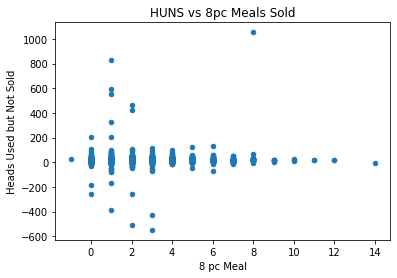

In [0]:
(df
 .plot
 .scatter(x='8pc_meal', y='huns')
 .set(title='HUNS vs 8pc Meals Sold',
      xlabel='8 pc Meal',
      ylabel='Heads Used but Not Sold')
);

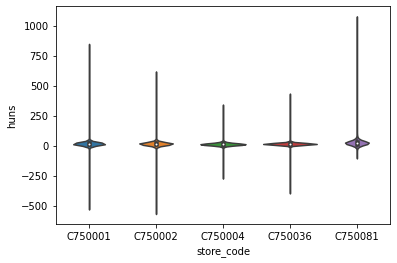

In [0]:
# HUNS by Store
import seaborn as sns
sns.violinplot(x='store_code', y='huns', data=df);

# (df
#  .plot
#  .scatter(x='store_code', y='huns')
#  .set(title='HUNS by Store',
#       xlabel='Store Code',
#       ylabel='Heads Used but Not Sold')
# );

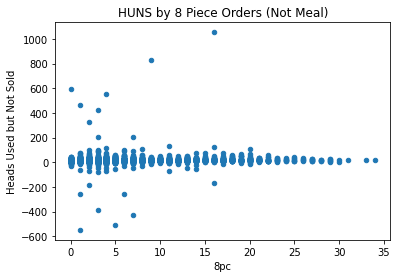

In [0]:
(df
 .plot
 .scatter(x='8pc', y='huns')
 .set(title='HUNS by 8 Piece Orders (Not Meal)',
      xlabel='8pc',
      ylabel='Heads Used but Not Sold')
);

In [0]:
df['huns'].value_counts()

 12.875    37
 14.625    35
 14.375    33
 10.000    30
 15.875    29
           ..
 2.250      1
-5.250      1
-9.500      1
-10.000     1
 57.375     1
Name: huns, Length: 500, dtype: int64

In [0]:
df.huns.isnull().sum()

0

In [0]:
df['huns'].describe().T

count    3530.000000
mean       17.155524
std        36.131985
min      -548.500000
25%        10.750000
50%        15.500000
75%        21.000000
max      1053.500000
Name: huns, dtype: float64

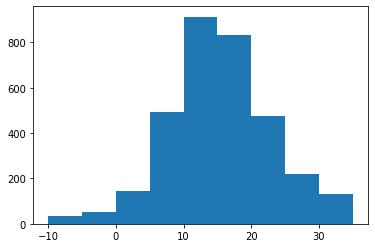

In [0]:
from matplotlib import pyplot as plt
plt.hist(df['huns'], bins=[-10, -5, 0, 5, 10, 15, 20, 25, 30, 35]);

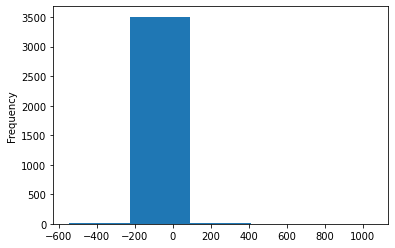

In [0]:
df['huns'].plot.hist(bins=5)

Text(0.5, 1.0, '20pc Meals')

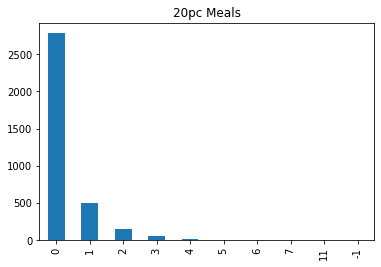

In [0]:
df['20pc_meal'].value_counts(sort=True).plot.bar().set_title('20pc Meals')

In [0]:
# Outliers
# Only keep rows where 0 <= huns <= 35
# Remove rows where 8pc_meal, 20pc, or 20pc_meal < 0
import numpy as np
df = df[(df['huns'] >= 0) &
        (df['huns'] <= 35) &
        (df['8pc_meal'] >= 0) &
        (df['20pc'] >= 0) &
        (df['20pc_meal'] >=0)]

# df = df[(df['price'] >= np.percentile(df['price'], 0.5)) & 
#         (df['price'] <= np.percentile(df['price'], 99.5)) & 
#         (df['latitude'] >= np.percentile(df['latitude'], 0.05)) & 
#         (df['latitude'] < np.percentile(df['latitude'], 99.95)) &
#         (df['longitude'] >= np.percentile(df['longitude'], 0.05)) & 
#         (df['longitude'] <= np.percentile(df['longitude'], 99.95))]

In [0]:
df.describe()

,huns,1pc,2pc,3pc,4pc,8pc,8pc_meal,12pc,12pc_meal,16pc,16pc_meal,20pc,20pc_meal
count,3201.000000,3201.000000,3201.000000,3201.000000,3201.000000,3201.000000,3201.000000,3201.000000,3201.000000,3201.000000,3201.000000,3201.000000,3201.000000
mean,15.894916,13.185255,41.138082,6.344892,2.237738,6.233052,2.317088,5.865355,1.679163,3.430490,0.974695,0.268041,0.322712
std,6.938438,9.031181,15.557584,5.555044,2.627028,5.875483,1.733057,3.247353,1.475583,2.350584,1.208427,0.584706,0.785342
min,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,7.000000,30.000000,2.000000,0.000000,2.000000,1.000000,3.000000,1.000000,2.000000,0.000000,0.000000,0.000000
50%,15.250000,13.000000,40.000000,5.000000,1.000000,4.000000,2.000000,5.000000,1.000000,3.000000,1.000000,0.000000,0.000000
75%,20.125000,19.000000,51.000000,9.000000,4.000000,9.000000,3.000000,8.000000,2.000000,5.000000,1.000000,0.000000,0.000000
max,35.000000,54.000000,110.000000,38.000000,15.000000,34.000000,12.000000,22.000000,9.000000,22.000000,14.000000,5.000000,11.000000


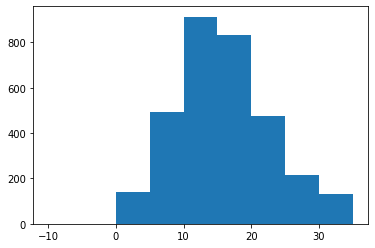

In [0]:
plt.hist(df['huns'], bins=[-10, -5, 0, 5, 10, 15, 20, 25, 30, 35])
plt.show();

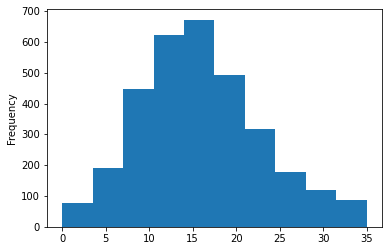

In [0]:
df['huns'].plot.hist()

In [0]:
# Date column is an int of format YYYYMMDD
df['date'] = pd.to_datetime(df['date'].astype(str), format='%Y%m%d')
df.head()

In [0]:
df.dtypes

store_code            object
date          datetime64[ns]
huns                 float64
1pc                    int64
2pc                    int64
3pc                    int64
4pc                    int64
8pc                    int64
8pc_meal               int64
12pc                   int64
12pc_meal              int64
16pc                   int64
16pc_meal              int64
20pc                   int64
20pc_meal              int64
dtype: object

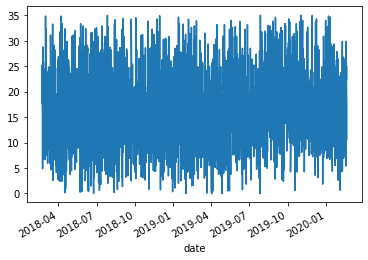

In [0]:
# ChickenHuns as time series
df.set_index('date')['huns'].plot()

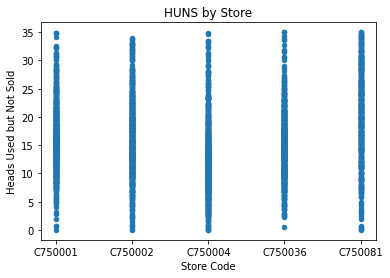

In [0]:
(df
 .plot
 .scatter(x='store_code', y='huns')
 .set(title='HUNS by Store',
      xlabel='Store Code',
      ylabel='Heads Used but Not Sold')
);

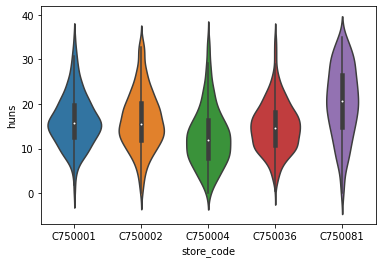

In [0]:
sns.violinplot(x='store_code', y='huns', data=df);

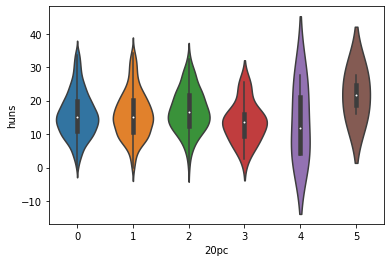

In [0]:
sns.violinplot(x='20pc', y='huns', data=df)

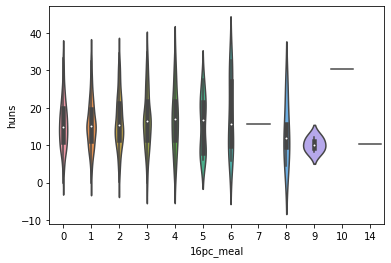

In [0]:
sns.violinplot(x='16pc_meal', y='huns', data=df)

## The Exploring

In [0]:
huns = df.copy()

In [0]:
huns['huns'].describe().T

count    3201.000000
mean       15.894916
std         6.938438
min         0.000000
25%        11.000000
50%        15.250000
75%        20.125000
max        35.000000
Name: huns, dtype: float64

In [0]:
huns['huns'].value_counts()

12.875    37
14.625    35
14.375    33
10.000    30
15.750    29
          ..
29.500     1
32.500     1
1.375      1
2.125      1
31.625     1
Name: huns, Length: 277, dtype: int64

In [0]:
# Pandas profiling
from pandas_profiling import ProfileReport
profile = ProfileReport(huns).to_notebook_iframe()
profile

In [0]:
# ax = (huns.plot.scatter(x='2pc', y='huns', s='1pc', alpha=.5))
# ax.set_title('2pc Orders vs HUNS with Points Sized by 1pc')
# ax.set_xlabel('2pc')
# ax.set_ylabel('HUNS')

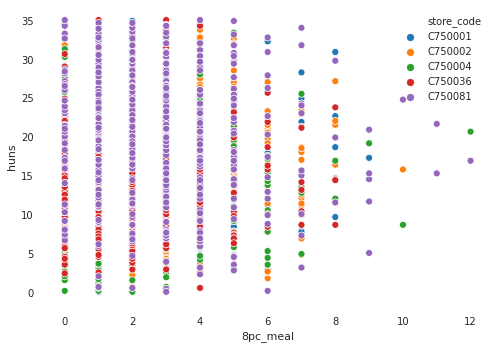

In [0]:
ax = sns.scatterplot(x='8pc_meal', y='huns', hue='store_code', data=huns)

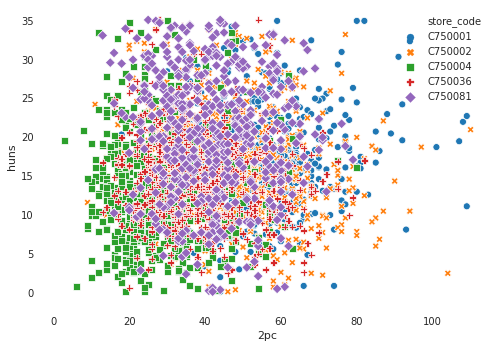

In [0]:
# Try this visuualization with engineered facet Day of Week
ax = sns.scatterplot(x='2pc', y='huns', hue='store_code', style='store_code', data=huns)

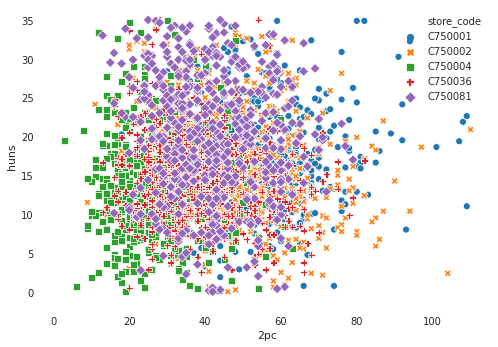

In [0]:
# condition = (huns.store_code == 'C750004')
condition = (huns['8pc'] != 0)
ax = sns.scatterplot(x='2pc',
                     y='huns',
                     hue='store_code',
                     style='store_code',
                  #   title='HUNS by 2pc where 8pc is not zero',
                     data=huns[condition])

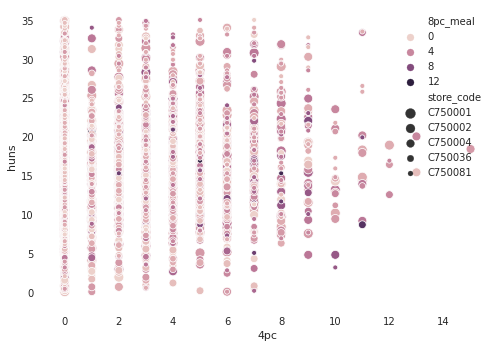

In [0]:
ax = sns.scatterplot(x='4pc',
                     y='huns',
                     hue='8pc_meal',
                     size='store_code',
                     data=huns)

In [0]:
# cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
# ax = sns.scatterplot(x='store_code', y='huns',
#                      hue='2pc', size='2pc',
#                      sizes=(5, 10), palette=cmap,
#                      legend='full', data=huns)

In [0]:
import plotly.express as px
px.scatter(huns, x='date', y='huns', color='8pc_meal', opacity=0.5)

In [0]:
import plotly.express as px
px.scatter(huns, x='date', y='huns', color='2pc', opacity=0.5)

In [0]:
import plotly.express as px
px.scatter(huns, x='2pc', y='huns')

# The Problem

## The Target: ChickenHuns
Heads Used but Not Sold (HUNS) is a measure of money lost and food wasted.

Engineered features that could be derived from this target:
- Today
- Tomorrow
- By restaurant
- Total across all restaurants

## The Problem: Regression
ChickenHuns is a continuous, numeric variable. Therefore, this is a regression problem.

But would it be worthwhile to great ChickenHuns as categorical? Examples would be yes/no or none/little/much.

Answer: whatever gives you the best answer based on applicable success criteria.

Logistic regression
Decision trees

## The Baseline: Mean

In [0]:
print(f'Average HUNS across all stores and all dates: {huns.huns.mean():.2f}')

Average HUNS across all stores and all dates: 15.89


In [0]:
print('Average HUNS by store')
huns.groupby('store_code')['huns'].mean()

Average HUNS by store


store_code
C750001    16.366058
C750002    16.296806
C750004    12.724407
C750036    14.969283
C750081    20.442010
Name: huns, dtype: float64

Average HUNS by store


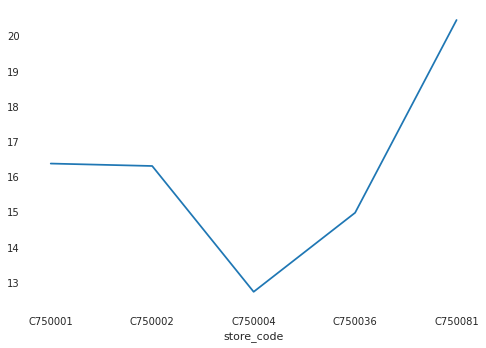

In [0]:
print('Average HUNS by store')
huns.groupby('store_code')['huns'].mean().plot()

In [0]:
# Stores 4 and 81

In [0]:
huns.groupby('store_code')['huns'].describe()

,count,mean,std,min,25%,50%,75%,max
store_code,,,,,,,,
C750001,657.0,16.366058,5.886425,0.0,12.500,15.750,19.87500,34.875
C750002,681.0,16.296806,6.609328,0.0,11.875,15.625,20.25000,34.000
C750004,674.0,12.724407,6.693881,0.0,7.875,12.000,16.37500,34.875
C750036,704.0,14.969283,5.677222,0.5,10.750,14.625,18.28125,35.000
C750081,485.0,20.442010,8.021537,0.0,14.750,20.625,26.50000,35.000


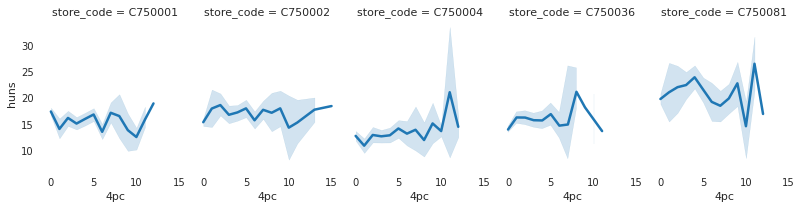

In [0]:
sns.relplot(x='4pc', y='huns', #hue="event", style="event",
            col='store_code', col_wrap=5,
            height=3, aspect=.75, linewidth=2.5,
            kind='line', data=huns);

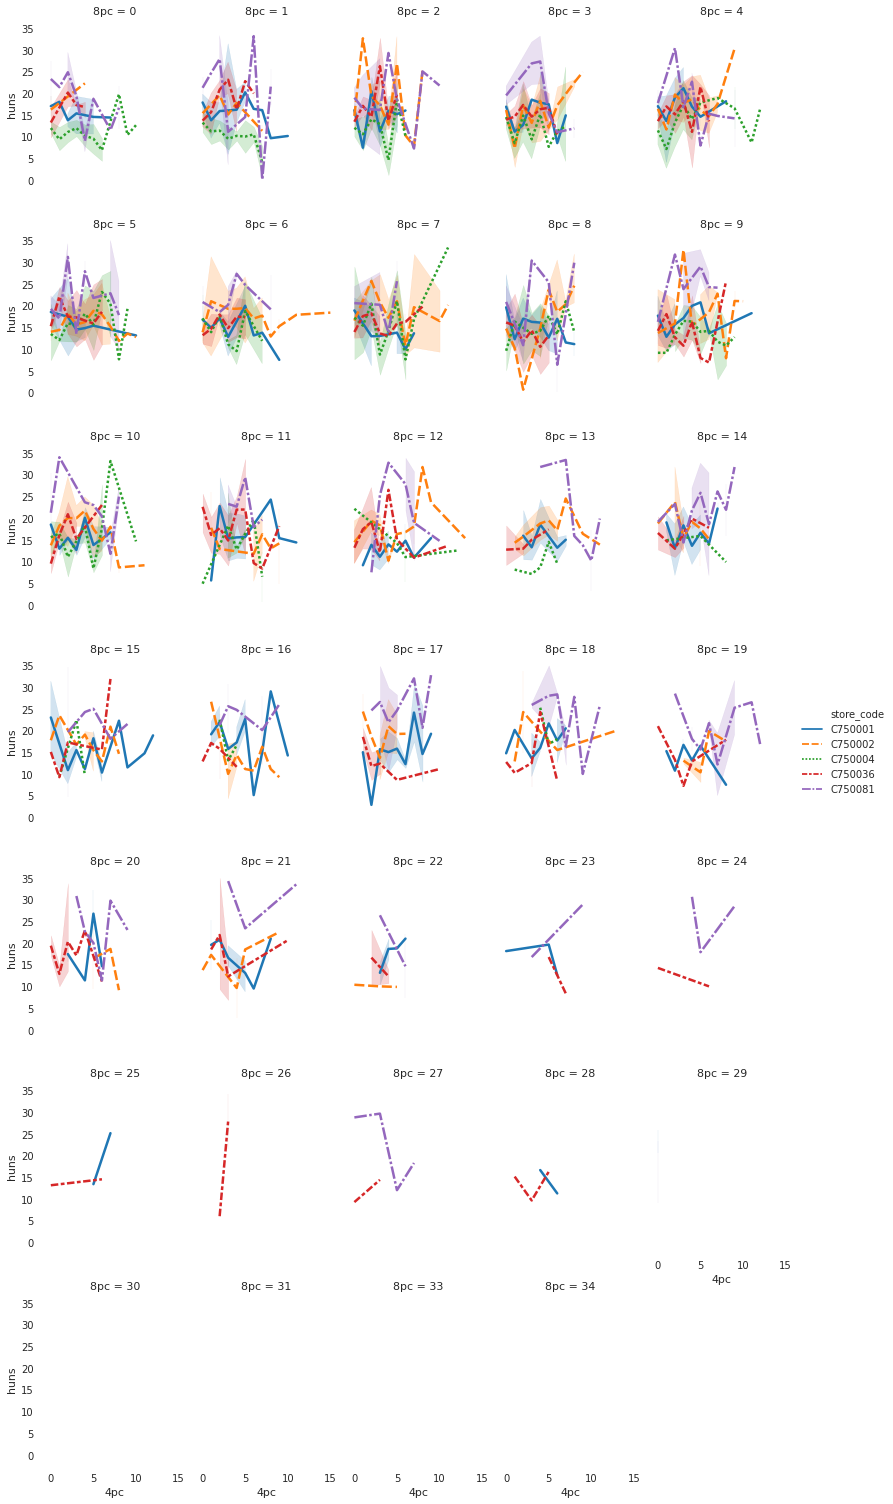

In [0]:
sns.relplot(x='4pc', y='huns', hue='store_code', style='store_code',
            col='8pc', col_wrap=5,
            height=3, aspect=.75, linewidth=2.5,
            kind='line', data=huns);

## The Distribution: Pretty normal

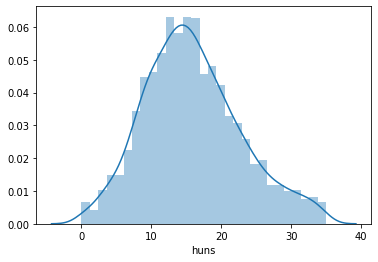

In [0]:
import seaborn as sns
sns.distplot(df['huns']);

## The Observations: Time-Based and/or Random Split
I'd rather not use date, because this time period includes management and other changes. Possibly I should try random and time based splits.

Then again, not using date might incur the problem of time travel.

Try it both ways and see.

At first glance, it appears that HUNS is roughly normal in a range from -548.5 to 1053.5. But this looks incorrect: neither negative nor very high numbers make sense. Get rid of negative numbers and very high numbers.

The same goes for other features, if necessary.

# The Feature Engineering
- Day of Week (categorical numeric)
- All meals
- Time series shift
  - Yesterday's ChickenHuns
  - Yesterday's meals
- Store trend (last week, month, etc. representing crackdown by regional manager?)
- Modulus of total pieces divided by eight (a head of chicken is eight pieces)
- Ratio of 24pc to 8pc (staff anticipating 24pc but disappointed?)
- Rolling averages of 24pc (inversely related to HUNS?)

In [0]:
# Add an integer column for day of week where Monday==0 and Sunday==6
huns['dow'] = huns['date'].dt.dayofweek
huns.head()

,store_code,date,huns,1pc,2pc,3pc,4pc,8pc,8pc_meal,12pc,12pc_meal,16pc,16pc_meal,20pc,20pc_meal,dow
0,C750001,2018-02-21,20.625,23,61,10,0,29,1,7,1,4,0,1,1,2
1,C750001,2018-02-22,18.125,19,78,5,0,23,3,14,0,9,1,0,0,3
2,C750001,2018-02-23,14.875,16,68,8,0,34,1,10,2,7,1,1,0,4
3,C750001,2018-02-24,25.875,17,48,4,0,29,2,9,1,5,1,0,0,5
4,C750001,2018-02-25,24.500,21,43,6,0,27,3,14,1,5,1,0,0,6


In [0]:
# We don't have more reports by day of week
huns.dow.value_counts().sort_index()

0    456
1    451
2    466
3    456
4    453
5    455
6    464
Name: dow, dtype: int64

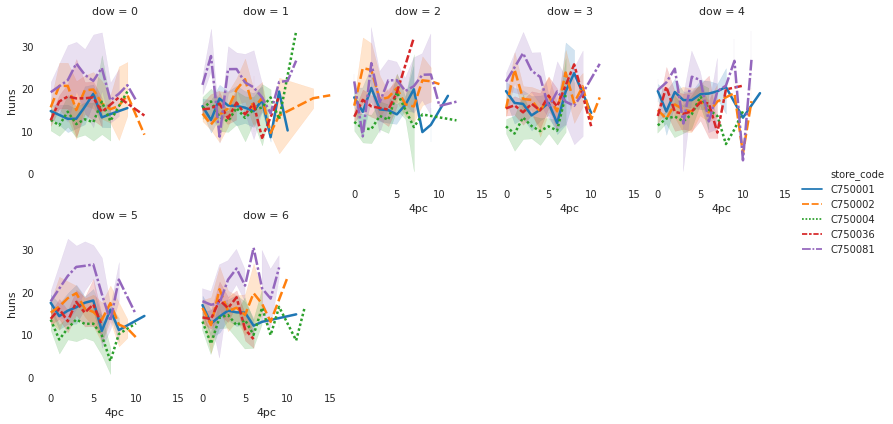

In [0]:
# But do we sell more chicken on weekends?
sns.relplot(x='4pc', y='huns', hue='store_code', style='store_code',
            col='dow', col_wrap=5,
            height=3, aspect=.75, linewidth=2.5,
            kind='line', data=huns);

In [0]:
# Add column for total pieces sold
huns['total_pc'] = (
    (huns['1pc']) +
    (huns['2pc']*2) +
    (huns['3pc']*3) +
    (huns['4pc']*4) +
    (huns['8pc']*8) +
    (huns['12pc']*12) +
    (huns['16pc']*16) +
    (huns['20pc']*20) +
    (huns['8pc_meal']*8) +
    (huns['12pc_meal']*12) +
    (huns['16pc_meal']*16) +
    (huns['20pc_meal']*20)
)

huns.head()

,store_code,date,huns,1pc,2pc,3pc,4pc,8pc,8pc_meal,12pc,12pc_meal,16pc,16pc_meal,20pc,20pc_meal,dow,total_pc
0,C750001,2018-02-21,20.625,23,61,10,0,29,1,7,1,4,0,1,1,2,615
1,C750001,2018-02-22,18.125,19,78,5,0,23,3,14,0,9,1,0,0,3,726
2,C750001,2018-02-23,14.875,16,68,8,0,34,1,10,2,7,1,1,0,4,748
3,C750001,2018-02-24,25.875,17,48,4,0,29,2,9,1,5,1,0,0,5,589
4,C750001,2018-02-25,24.500,21,43,6,0,27,3,14,1,5,1,0,0,6,641


# The Train/Test Split
X features

y target

In [0]:
# time based split
# train = df[df['Date'].dt.year <= 2016]
# val = df[df['Date'].dt.year == 2017]
# test = df[df['Date'].dt.year >= 2018]
# df['created'] = pd.to_datetime(df['created'], infer_datetime_format=True)
# cutoff = pd.to_datetime('2016-06-01')
# train = df[df.created < cutoff]
# test  = df[df.created >= cutoff]
# train = homes[homes.Yr_Sold < 2009]
# val = homes[homes.Yr_Sold == 2009]
# test  = homes[homes.Yr_Sold == 2010]

In [0]:
from sklearn.model_selection import train_test_split

# Split into train and test
train, test = train_test_split(huns, train_size=0.80, test_size=0.20,
                               random_state=42)

# Split train into train and val
train, val = train_test_split(train, train_size=0.80, test_size=0.20, 
                              random_state=42)

train.shape, test.shape, val.shape

((2048, 17), (641, 17), (512, 17))

In [0]:
# Arrange data into X features matrix and y target vector
target = 'huns'
features_to_drop = [target, 'date']
features = huns.columns.drop(features_to_drop)

X_train = train[features]
y_train = train[target]

X_val = val[features]
y_val = val[target]

X_test = test[features]
y_test = test[target]

X_train.shape, y_train.shape

((2048, 15), (2048,))

In [0]:
X_val.shape, y_val.shape

((512, 15), (512,))

In [0]:
X_test.shape, y_test.shape

((641, 15), (641,))

In [0]:
X_train.head()

,store_code,1pc,2pc,3pc,4pc,8pc,8pc_meal,12pc,12pc_meal,16pc,16pc_meal,20pc,20pc_meal,dow,total_pc
1476,C750004,4,32,0,0,3,3,3,2,3,0,0,0,5,224
989,C750002,20,52,0,0,7,5,5,2,2,0,0,1,6,356
621,C750001,19,44,7,8,19,1,4,2,3,5,0,0,1,520
857,C750002,0,55,3,0,2,6,7,4,10,5,1,0,6,575
753,C750002,32,61,1,0,0,2,1,2,4,2,0,0,0,305


## The Evaluation Metrics: R^2 and MAE
Evaluation metric(s) for this regression problem will be mean absolute error.

In [0]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

baseline_pred = [huns.huns.mean()] * len(y_train)
baseline_mae = mean_absolute_error(y_train, baseline_pred)
print(f'Baseline Mean Absolute Error: {baseline_mae:.4f}')
print(f'Baseline R^2 Score: {r2_score(y_train, baseline_pred):.8f}')

Baseline Mean Absolute Error: 5.5451
Baseline R^2 Score: -0.00000468


# The Models

## Linear Regression

In [0]:
import category_encoders as ce
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

lr_v1 = make_pipeline(
    ce.TargetEncoder(),  
    LinearRegression()
)

lr_v1.fit(X_train, y_train)
print('Linear Regression v1 R^2', lr_v1.score(X_val, y_val))

Linear Regression v1 R^2 0.11559651552121475


In [0]:
coefficients = lr_v1.named_steps['linearregression'].coef_
pd.Series(coefficients, features)

store_code    1.054399
1pc           0.053500
2pc          -0.007108
3pc           0.097348
4pc           0.010332
8pc           0.098867
8pc_meal      0.013206
12pc         -0.000844
12pc_meal     0.016502
16pc         -0.024073
16pc_meal     0.154541
20pc         -0.269223
20pc_meal     0.091682
dow          -0.035700
total_pc     -0.006194
dtype: float64

In [0]:
lr_v2 = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    LinearRegression()
)

lr_v2.fit(X_train, y_train)
print('Linear Regression v2 R^2', lr.score(X_val, y_val))

Linear Regression v2 R^2 0.11559651552121475


In [0]:
# Model quality

y_pred_train = lr_v1.predict(X_train)
y_pred_test = lr_v1.predict(X_test)

print(f'Linear Regression Train Mean Absolute Error: {mean_absolute_error(y_train, y_pred_train):.4f}')
print(f'Linear Regression Train R^2 Score: {r2_score(y_train, y_pred_train):.8f}')
print(f'Linear Regression Test Mean Absolute Error: {mean_absolute_error(y_test, y_pred_test):.4f}')
print(f'Linear Regression Test R^2 Score: {r2_score(y_test, y_pred_test):.8f}')

Linear Regression Train Mean Absolute Error: 5.1182
Linear Regression Train R^2 Score: 0.13347591
Linear Regression Test Mean Absolute Error: 5.1793
Linear Regression Test R^2 Score: 0.07893583


## Gradient Boosting

In [0]:
from xgboost import XGBRegressor

gb = make_pipeline(
    ce.OrdinalEncoder(), 
    XGBRegressor(n_estimators=200, objective='reg:squarederror', n_jobs=-1)
)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_val)
print('Gradient Boosting R^2', r2_score(y_val, y_pred))

Gradient Boosting R^2 0.053551140939571695


In [0]:
y_pred_val_gb = gb.predict(X_val)
y_pred_test_gb = gb.predict(X_test)
print(f'XGB Validation accuracy {gb.score(X_val, y_val)*100:.4f}%')
print(f'XGB Validation R^2 Score: {r2_score(y_val, y_pred_val_gb):.8f}')
print(f'XGB Test accuracy {gb.score(X_test, y_test)*100:.4f}%')
print(f'XGB Test R^2 score: {r2_score(y_test, y_pred_test_gb):.8f}')

XGB Validation accuracy 5.3551%
XGB Validation R^2 Score: 0.05355114
XGB Test accuracy 3.7068%
XGB Test R^2 score: 0.03706827


In [0]:
gb.named_steps['xgbregressor'].feature_importances_

array([0.30545333, 0.0574817 , 0.0418634 , 0.0659302 , 0.0318491 ,
       0.06439529, 0.05032274, 0.05392902, 0.03750566, 0.05899502,
       0.0369128 , 0.04277492, 0.03981649, 0.06317578, 0.04959459],
      dtype=float32)

### The Partial Dependence Plot With One Feature



In [0]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 72

In [0]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = '4pc'

isolated = pdp_isolate(
    model=gb,
    dataset=X_val,
    model_features=X_val.columns,
    feature=feature
)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


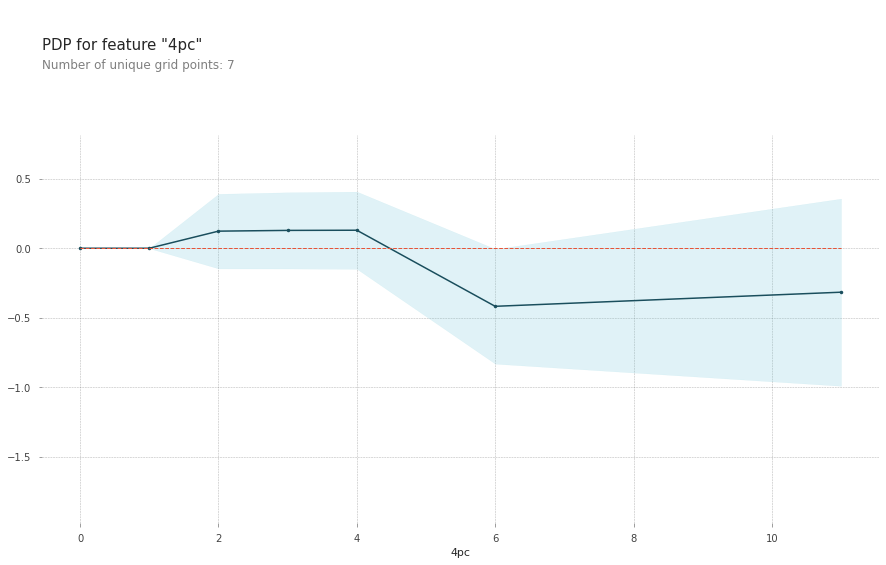

In [0]:
pdp_plot(isolated, feature_name=feature);

### The Partial Dependence Plot With Two Features

In [0]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

features = ['2pc', 'total_pc']

interaction = pdp_interact(
    model=gb,
    dataset=X_val,
    model_features=X_val.columns,
    features=features
)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


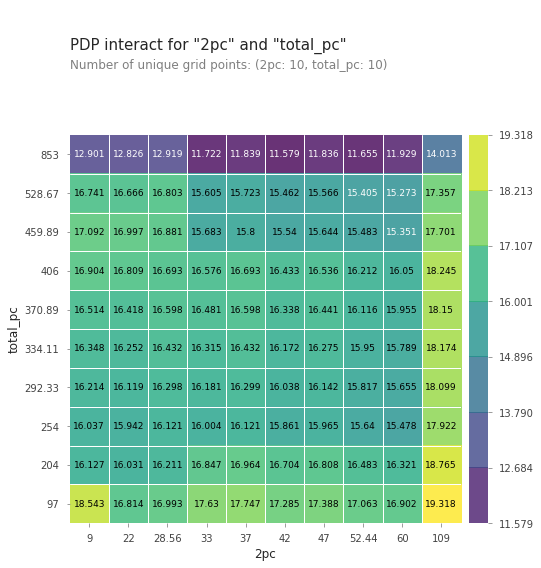

In [0]:
pdp_interact_plot(interaction, plot_type='grid', feature_names=features);

## Random Forest

In [0]:
X_train.head()

,store_code,1pc,2pc,3pc,4pc,8pc,8pc_meal,12pc,12pc_meal,16pc,16pc_meal,20pc,20pc_meal,dow,total_pc
1476,C750004,4,32,0,0,3,3,3,2,3,0,0,0,5,224
989,C750002,20,52,0,0,7,5,5,2,2,0,0,1,6,356
621,C750001,19,44,7,8,19,1,4,2,3,5,0,0,1,520
857,C750002,0,55,3,0,2,6,7,4,10,5,1,0,6,575
753,C750002,32,61,1,0,0,2,1,2,4,2,0,0,0,305


In [0]:
X_test.head()

,store_code,1pc,2pc,3pc,4pc,8pc,8pc_meal,12pc,12pc_meal,16pc,16pc_meal,20pc,20pc_meal,dow,total_pc
1452,C750004,0,36,0,0,2,2,3,2,3,0,0,0,2,212
1252,C750002,24,47,7,7,2,1,3,3,1,1,0,1,4,315
3170,C750081,12,59,0,0,3,3,7,2,4,0,0,1,6,370
1607,C750004,0,62,0,0,0,2,2,2,1,1,0,0,3,220
228,C750001,30,107,4,0,2,5,3,1,9,1,0,0,4,520


In [0]:
y_train.shape, y_test.shape

((2048,), (641,))

In [0]:
X_train.shape, X_test.shape

((2048, 15), (641, 15))

In [0]:
# Encode with one-hot encoding
encoder = ce.OneHotEncoder(use_cat_names=True)
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)
X_val = encoder.transform(X_val)

X_train.head()

,store_code_C750004,store_code_C750002,store_code_C750001,store_code_C750036,store_code_C750081,1pc,2pc,3pc,4pc,8pc,8pc_meal,12pc,12pc_meal,16pc,16pc_meal,20pc,20pc_meal,dow,total_pc
1476,1,0,0,0,0,4,32,0,0,3,3,3,2,3,0,0,0,5,224
989,0,1,0,0,0,20,52,0,0,7,5,5,2,2,0,0,1,6,356
621,0,0,1,0,0,19,44,7,8,19,1,4,2,3,5,0,0,1,520
857,0,1,0,0,0,0,55,3,0,2,6,7,4,10,5,1,0,6,575
753,0,1,0,0,0,32,61,1,0,0,2,1,2,4,2,0,0,0,305


In [0]:
from scipy.stats import randint, uniform
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

param_distributions = { 
    'n_estimators': randint(50, 500), 
    'max_depth': [5, 10, 15, 20, None], 
    'max_features': uniform(0, 1), 
}

search = RandomizedSearchCV(
    RandomForestRegressor(random_state=42), 
    param_distributions=param_distributions, 
    n_iter=5, 
    cv=2, 
    scoring='neg_mean_absolute_error', 
    verbose=10, 
    return_train_score=True, 
    n_jobs=-1, 
    random_state=42
)

search.fit(X_train, y_train);

Fitting 2 folds for each of 5 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    6.8s finished


In [0]:
print('Best hyperparameters', search.best_params_)
print('Cross-validation MAE', -search.best_score_)
model = search.best_estimator_

Best hyperparameters {'max_depth': 15, 'max_features': 0.020584494295802447, 'n_estimators': 307}
Cross-validation MAE 5.208361854185236


### The Shapley Plot

In [0]:
# Get an individual observation to explain.
# For example, the 0th row from the test set.
row = X_test.iloc[[0]]
row

,store_code_C750004,store_code_C750002,store_code_C750001,store_code_C750036,store_code_C750081,1pc,2pc,3pc,4pc,8pc,8pc_meal,12pc,12pc_meal,16pc,16pc_meal,20pc,20pc_meal,dow,total_pc
1452,1,0,0,0,0,0,36,0,0,2,2,3,2,3,0,0,0,2,212


In [0]:
# What was the actual HUNS for this store on Tuesday?
y_test.iloc[[0]]

1452    14.125
Name: huns, dtype: float64

In [0]:
# What does the model predict for this apartment?
model.predict(row)

array([14.99931548])

In [0]:
# Why did the model predict this?
# Look at a Shapley Values Force Plot
import shap

In [0]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(row)
shap_values

array([[-0.8853175 , -0.02984706, -0.09339867,  0.04809295, -0.43119706,
        -0.03494918,  0.24543319, -0.06960288,  0.12345332, -0.17392745,
         0.31959741, -0.15943665,  0.02432695,  0.17929066,  0.16717787,
         0.0568858 ,  0.02613245,  0.15384884, -0.35216264]])

In [0]:
shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value,
    shap_values=shap_values,
    features=row
)

In [0]:
y_train.mean()

15.87982177734375

In [0]:
explainer.expected_value

array([15.88491513])

In [0]:
shap_values

array([[-0.8853175 , -0.02984706, -0.09339867,  0.04809295, -0.43119706,
        -0.03494918,  0.24543319, -0.06960288,  0.12345332, -0.17392745,
         0.31959741, -0.15943665,  0.02432695,  0.17929066,  0.16717787,
         0.0568858 ,  0.02613245,  0.15384884, -0.35216264]])

In [0]:
X_train.columns

Index(['store_code_C750004', 'store_code_C750002', 'store_code_C750001',
       'store_code_C750036', 'store_code_C750081', '1pc', '2pc', '3pc', '4pc',
       '8pc', '8pc_meal', '12pc', '12pc_meal', '16pc', '16pc_meal', '20pc',
       '20pc_meal', 'dow', 'total_pc'],
      dtype='object')

In [0]:
model.predict(row)

array([14.99931548])

In [0]:
explainer.expected_value + shap_values.sum()

array([14.99931548])

In [0]:
# Predict function
def predict(two_pc, four_pc, total_pc, eight_pc_meal):

    # Make dataframe from the inputs
    df = pd.DataFrame(
        data=[[two_pc, four_pc, total_pc, eight_pc_meal]], 
        columns=['2pc', '4pc', 'total_pc', '8pc_meal']
    )

    # Get the model's prediction
    pred = model.predict(df)[0]

    # Calculate shap values
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(df)

    # Get series with shap values, feature names, & feature values
    feature_names = df.columns
    feature_values = df.values[0]
    shaps = pd.Series(shap_values[0], zip(feature_names, feature_values))

    # Print results
    result = f'${pred:,.0f} estimated rent for this NYC apartment. \n\n'
    result += f'Starting from baseline of ${explainer.expected_value} \n'
    result += shaps.to_string()
    print(result)


    # Show shapley values force plot
    shap.initjs()
    return shap.force_plot(
        base_value=explainer.expected_value, 
        shap_values=shap_values, 
        features=df
    )

In [0]:
predict(10, 8, 200, 5)

ValueError: ignored

## Permutations

In [0]:
gb.named_steps

{'ordinalencoder': OrdinalEncoder(cols=['store_code'], drop_invariant=False,
                handle_missing='value', handle_unknown='value',
                mapping=[{'col': 'store_code', 'data_type': dtype('O'),
                          'mapping': C750004    1
 C750002    2
 C750001    3
 C750036    4
 C750081    5
 NaN       -2
 dtype: int64}],
                return_df=True, verbose=0),
 'xgbregressor': XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              importance_type='gain', learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=None, n_estimators=200,
              n_jobs=-1, nthread=None, objective='reg:squarederror',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)}

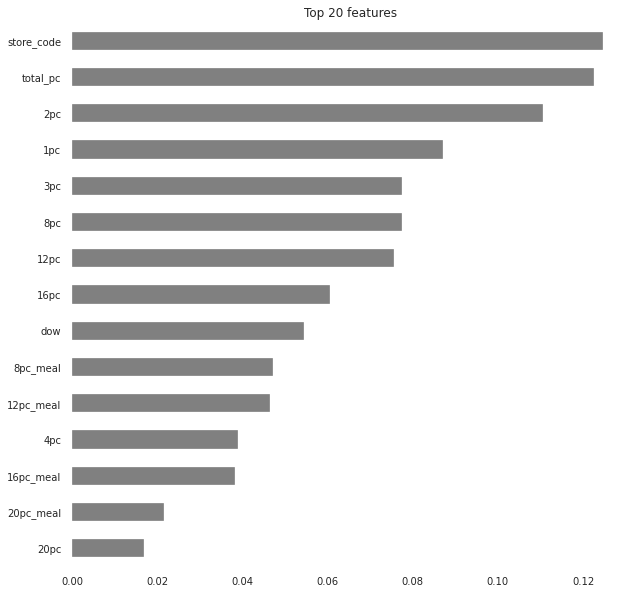

In [0]:
# Get feature importances
rf = pipeline.named_steps['randomforestregressor']
importances = pd.Series(rf.feature_importances_, X_train.columns)

# Plot feature importances
%matplotlib inline
import matplotlib.pyplot as plt

n = 20
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='grey');

In [0]:
# Ignore warnings
# doesn't work with pipelines, so separate encoder and imputer

# Data transformation

transformers = make_pipeline(
    ce.ordinal.OrdinalEncoder(),
    SimpleImputer()
)

X_train_transformed = transformers.fit_transform(X_train)
X_val_transformed = transformers.transform(X_val)

# Model fitting
# Now create random forest model separately

model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train_transformed, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [0]:
import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(
    model,
#    scoring='accuracy',
#    n_iter=5,
#    random_state=42
)

permuter.fit(X_val_transformed, y_val)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.

Using TensorFlow backend.


PermutationImportance(cv='prefit',
                      estimator=RandomForestRegressor(bootstrap=True,
                                                      ccp_alpha=0.0,
                                                      criterion='mse',
                                                      max_depth=None,
                                                      max_features='auto',
                                                      max_leaf_nodes=None,
                                                      max_samples=None,
                                                      min_impurity_decrease=0.0,
                                                      min_impurity_split=None,
                                                      min_samples_leaf=1,
                                                      min_samples_split=2,
                                                      min_weight_fraction_leaf=0.0,
                                                      n_estimators=100

### Feature importances before engineering dow and total_pc

Weight	Feature

0.2094 ± 0.0952	store_code

0.0054 ± 0.0262	2pc

0.0024 ± 0.0059	8pc_meal

0.0012 ± 0.0070	20pc

0.0007 ± 0.0299	8pc

-0.0019 ± 0.0094	12pc_meal

-0.0031 ± 0.0065	20pc_meal

-0.0041 ± 0.0146	16pc_meal

-0.0041 ± 0.0282	3pc

-0.0058 ± 0.0093	4pc

-0.0094 ± 0.0320	12pc

-0.0095 ± 0.0299	16pc

-0.0167 ± 0.0061	1pc

### After
Weight	Feature

0.2367 ± 0.0579	store_code

0.0085 ± 0.0103	total_pc

0.0040 ± 0.0106	8pc

-0.0004 ± 0.0078	20pc_meal

-0.0007 ± 0.0046	20pc

-0.0009 ± 0.0176	1pc

-0.0034 ± 0.0054	8pc_meal

-0.0034 ± 0.0046	4pc

-0.0077 ± 0.0053	16pc_meal

-0.0101 ± 0.0090	16pc

-0.0105 ± 0.0098	12pc_meal

-0.0112 ± 0.0360	2pc

-0.0115 ± 0.0183	dow

-0.0159 ± 0.0222	12pc

-0.0202 ± 0.0177	3pc

In [0]:
feature_names = X_val.columns.to_list()

pd.Series(permuter.feature_importances_, feature_names).sort_values(ascending=True)

3pc          -0.020219
12pc         -0.015851
dow          -0.011478
2pc          -0.011247
12pc_meal    -0.010542
16pc         -0.010074
16pc_meal    -0.007701
4pc          -0.003445
8pc_meal     -0.003372
1pc          -0.000887
20pc         -0.000679
20pc_meal    -0.000419
8pc           0.003953
total_pc      0.008546
store_code    0.236725
dtype: float64

In [0]:
eli5.show_weights(permuter,
                  top=None,
                  feature_names=feature_names)

Weight,Feature
0.2367 ± 0.0579,store_code
0.0085 ± 0.0103,total_pc
0.0040 ± 0.0106,8pc
-0.0004 ± 0.0078,20pc_meal
-0.0007 ± 0.0046,20pc
-0.0009 ± 0.0176,1pc
-0.0034 ± 0.0054,8pc_meal
-0.0034 ± 0.0046,4pc
-0.0077 ± 0.0053,16pc_meal
-0.0101 ± 0.0090,16pc
